# 01. Introduction to Deep Learning. Basic Models

Deep learning unlocks:

- [Multimodal learning](https://www.v7labs.com/blog/multimodal-deep-learning-guide)
- Multi task learning
- Self supervised learning
- Self learning - as a concept
- Transfer learning
- Domain knowledge transfer
- Train an algorithm on synthetic data and then use it on real life data
- Image recognition - YEII!
- LLM (Large Language Models) for many languages (ChatGPT Llama etc.)


The process of training the NNs is incredibly important

Types of data we will see:
- Unstructured data:
    - Images
    - Text
    
etc.
    

Reinforcement Learning -> The model becomes an [**agent**](https://zapier.com/blog/ai-agent/) that can change the enviornment that it is being trained it. 

### Vanishing gradient problem

Example:

We inspect layer 14 to see what the weights are and check if the network is being trained. We see that the weights do not change. This can be due to [Vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem):

**_Vanishing gradient problem:_** In machine learning, the vanishing gradient problem is encountered when training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, during each iteration of training each of the neural networks weights receives an update proportional to the partial derivative of the error function with respect to the current weight.[1] The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value.[1] In the worst case, this may completely stop the neural network from further training.[1] As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0,1], and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the early layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the early layers train very slowly.

**Further explanation:** In the example we use backprogation which starts from the last layer and moves back to the first layer (hence BACK-propagation). If we use this hyperbolic tangent function:

<img src="images/hyperbolic-tangent-function.png" alt="Hyperbolic tangent function" style="width:400px;"/>

We see that the Range is [0;1] and due to the chain rule of derivatives the gradient will become smaller and smaller since we keep multiplying by a number that $\in$ [0,1]. Since we do it from the back to the front the last layers will be chaning but the first ones in the worst case might not at all.

## [ReLU to the rescue](https://builtin.com/machine-learning/relu-activation-function)

Sigmoid and tanh were monotonous, differentiable and previously more popular activation functions. However, these functions suffer saturation over time, and this leads to problems occurring with vanishing gradients. An alternative and the most popular activation function to overcome this issue is the Rectified Linear Unit (ReLU).

```
A rectified linear unit (ReLU) is an activation function that introduces the property of non-linearity to a deep learning model and solves the vanishing gradients issue. "It interprets the positive part of its argument. It is one of the most popular activation functions in deep learning. 
```

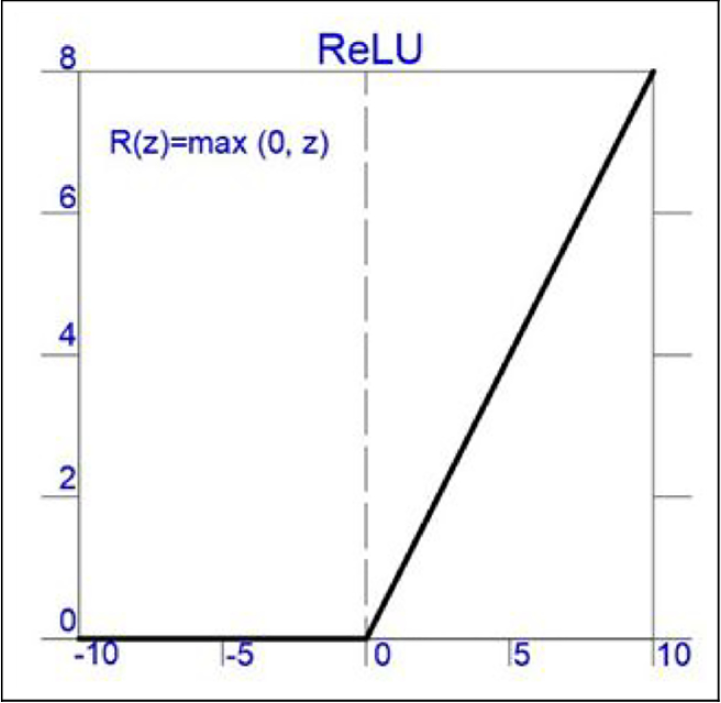
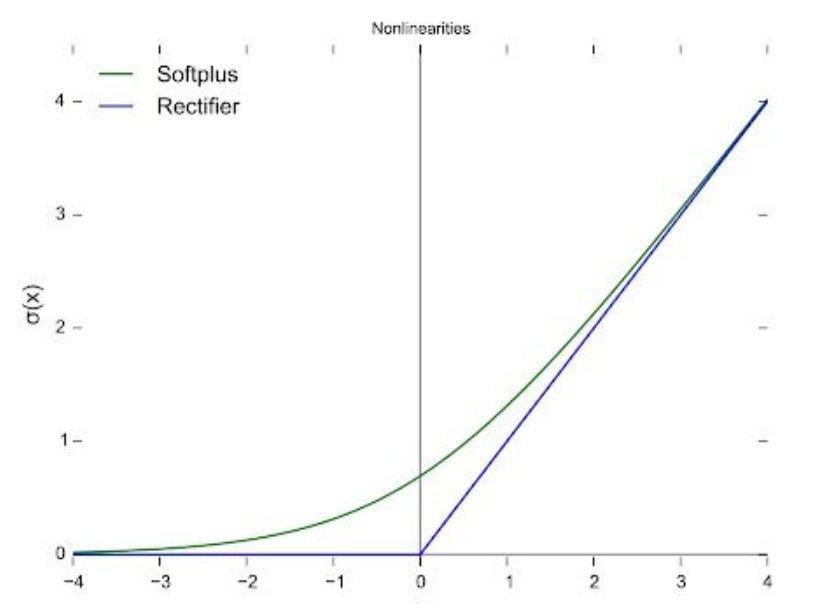

### Quantization

Techniques for faster model training:
- [Quantization](https://www.youtube.com/watch?v=v1oHf1KV6kM) 
    - Quantization is the process of mapping continuous infinite values to a smaller set of discrete finite values. In the context of simulation and embedded computing, it is about approximating real-world values with a digital representation that introduces limits on the precision and range of a value.
    - Example: converting float weights of the NN to integers. Effects:
        - <span style="color:green;">Reduces the memory the NN takes</span>
        - <span style="color:green;">Faster inference</span>
        - <span style="color:red;">Less accuracy</span>
        
    - 2 types of Quantization:
        - Post model Quantization - Train the model then reduct the weights
        - Quantization Aware Training:
            - Train. Reduce the weights at some point. Repeat. ( Explanation from the video above)
            - [Link](https://towardsdatascience.com/inside-quantization-aware-training-4f91c8837ead) - As we move to a lower precision from float, we generally notice a significant accuracy drop as this is a lossy process. This loss can be minimized with the help of quant-aware training. So basically, quant-aware training simulates low precision behavior in the forward pass, while the backward pass remains the same. This induces some quantization error which is accumulated in the total loss of the model and hence the optimizer tries to reduce it by adjusting the parameters accordingly. This makes our parameters more robust to quantization making our process almost lossless.

### Mistake in ROC results in ML course note

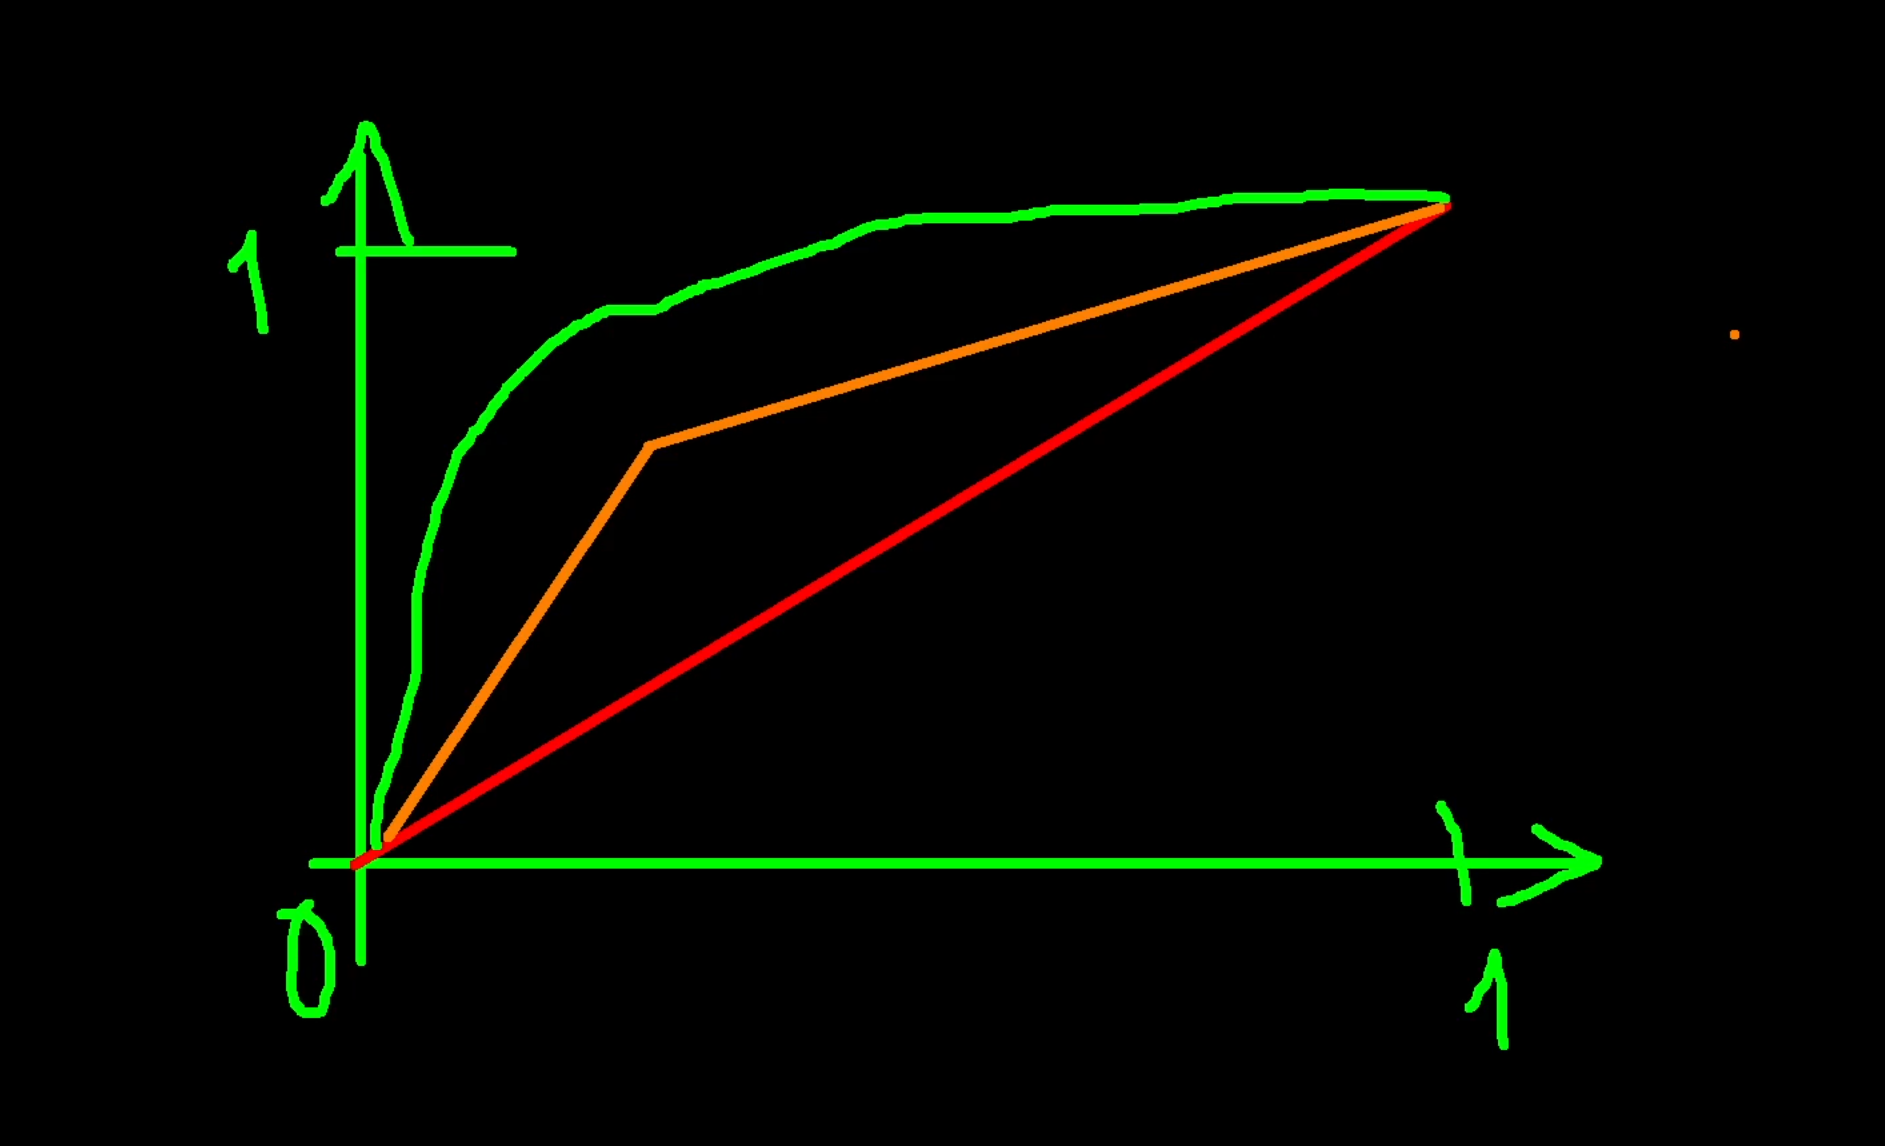
[ROC problem example in StackOverflow](https://stackoverflow.com/questions/42916137/why-does-my-roc-curve-look-like-a-v)


Summary: We are not using a Probabilistic classifier that the ROC curve is meant to be used for. Example results of prediction it is supposed to be used on: [0.123, 0.445, 0,67 etc..] not [0, 1, 0 , 1, 1]

We can think of the ROC curve being build as all the different thresholds that we can choose to classify 0 or 1 FROM THOSE proababilistic results 0.123, 0.664 etc. Think what will happen if we don't have the results as floats but just 0s and 1s. [Here is the GOAT StatQuest explaining it in details](https://www.youtube.com/watch?v=4jRBRDbJemM). 

To understand why its a V shape or why there is 1 point other than (0,0) and (1,1) think of it as thresholds between the UNIQUE proba values. There will be only 1 available threshold between all the available UNIQUE!! results which are [0, 1]. So we have a V shape ROC curve.

**Important:** Don't use ROC curve on NON PROBABILISTIC CLASSIFIERS

## [Pytorch vs Tensorflow](https://medium.com/@Learnbay_official/pytorch-vs-tensorflow-major-difference-among-deep-learning-cea7bf35ad11)

Pytorch - requires a lot more code to do the same thing compared to TF

We will be using mainly Tensorflow (Keras POG)

In TF we can define a loss function - giving it a specific task so to say. With great power comes great responsibility so be careful how you define it.

In scikit-learn's NN we don't use Learning Curves. With TF they are incredibly important to understand how the training is going.

Images - Pixels that are close together have a similar context aka Convolution (a way of feature extraction)

NLP - Words in a text - [Markov's chain](https://www.geeksforgeeks.org/markov-chains-in-nlp/)

We can analyze a corpus of text and generate a Markov chain with probabilites of jumping from one word to the next based on the corpus. This can be used for text generation, speech recognition, and sentiment analysis.

## Install Tensorflow

Tensorflow doesn't work well with other libraries installed around it (in the same [venv](https://docs.python.org/3/library/venv.html))
1. Create new venv
2. conda/pip install tensorflow - depending if you use conda or venv

Depending on yor GPU it can happen very easily or not happen at all. I have NVIDIA RTX 2060 Super and it worked easily.

I talked with a Team Lead of an ML team from the idustry for tips on getting better at ML and one of the things he said was to stop working on your local machine. Get a cheap cloud machine and learn to work remotely. When you work in the industry the dataset are huge and they can't fit on a local machine. The compute power you need to train a model as well is really demanding for a local machine. This is why AI is so closely coupled with the CLOUD. Many of the job offers require Docker, Kuberneties, AWS/Azure services etc. 

In [1]:
#Check your video card (if its NVIDIA) with this

!nvidia-smi

Tue Dec 19 13:15:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.36                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060 ...    On  | 00000000:08:00.0  On |                  N/A |
|  0%   58C    P0              39W / 184W |   1354MiB /  8192MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### How to install 2.15 Tensorflow on windows with WSL2:

[What is WSL2?](https://learn.microsoft.com/en-us/windows/wsl/install)
```
Developers can access the power of both Windows and Linux at the same time on a Windows machine. The Windows Subsystem for Linux (WSL) lets developers install a Linux distribution (such as Ubuntu, OpenSUSE, Kali, Debian, Arch Linux, etc) and use Linux applications, utilities, and Bash command-line tools directly on Windows, unmodified, without the overhead of a traditional virtual machine or dualboot setup.
```

Make sure you have enough space on C: (10-20GB)

#### How to install and run WSL:
1. Make sure you have CPU virtualization in your BIOS
2. Open PowerShell and execute:
   ```
   wsl --install
   ```
3. *This will install Ubutu by default
4.  Write in the console
    ```
    wsl
    ```
5. This will open a linux terminal in the distro you just installed. Congratulations you have Linux while on Windows.

#### Steps to create a venv and intsall TF 2.15 in it
1. While still in the wsl linux distro terminal install miniconda on the linux:
   ```
   curl https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -o Miniconda3-latest-Linux-x86_64.sh
   bash Miniconda3-latest-Linux-x86_64.sh
   ```
2. Create a new venv:
   ```
   conda create -n tf python=3.11
   ```
3. Exit out of wsl with:
   ```
   exit
   ```
4. Start wsl again with:
   ```
   wsl
   ```
5. Activate the new env you created:
   ```
   conda activate tf   
   ```
6. Install tensorflow 2.15 with:
   ```
   {pip/conda} install tensorflow[and-cuda]
   ```
7. Install jupyter lab
   ```
   conda install jupyterlab
   ```

This installs the Distro and it's root folder is in C:/. I moved the distro to D: where I have 900GB with [this](https://superuser.com/a/1695880). I didn't unregister just straight up moved it and it worked, heh

## Multimodal ML lection DEV.BG 13.12.2023

Types of data: 
- text
- audio
- image
- video

temporal encoding

Holistic understanding of multiple data types - joint probabilities

Examples for image and text: Captioning, Retireval, Generation

Vision Transformer instead of CNN?

Computer Vision - Contrastive learning - usupervised representation learning

## Lecture continues

[Remove tf warnings](https://stackoverflow.com/questions/35869137/avoid-tensorflow-print-on-standard-error)

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [3]:
gpu = tf.config.list_physical_devices('GPU')[0]

Tensorflow by default takes the full capacity of the GPU memory. Which we don't want. We want to use only what we need. Do this before you start any TF processes


Hence the next line:

In [4]:
tf.config.experimental.set_memory_growth(gpu, True)

Using GPU over CPU can increase performance in the magnitude of $ 10^2  \sim 10^4 $

It can take an hour instead of a month to train a NN

Instead of using CPU and RAM for storing the model data which are far apart and create latency and time delay for the calculations,
when using GPU we use the GPU's memory for the models. Which is inside the GPU so that latency is much smaller, making it faster. The downside is that usually GPU memory is a couple of times smaller than RAM. You need to be able to fit the model and atleast 1 batch of the data to train on the model in the GPU memory.

## What is a [tensor](https://youtu.be/L35fFDpwIM4?t=504)?

Tensor = Multidimensional matrix ( [is an algebraic object that describes a multilinear relationship between sets of algebraic objects related to a vector space](https://en.wikipedia.org/wiki/Tensor) )

Tensors don't just hold the data in a Vector/Matrix/Multidimentional Array form. [**They are designed in a way to allow easy math calculations by GPUs on the data**](https://youtu.be/L35fFDpwIM4?t=413). Tensors also take care of the chain rule derivative calculations.

- Vector = Tensor with rank 1
- Matrix = Tensor with rank 2
- etc.

Example:
Image is a tensor with 3 ranks: Width, Height and 3 channels

### Tensor calculations example

In [5]:
a = tf.constant(15)
b = tf.constant(38)
type(a)

tensorflow.python.framework.ops.EagerTensor

In [6]:
tf.pow(tf.add(tf.multiply(2, a), tf.multiply(3, b)), 2)

<tf.Tensor: shape=(), dtype=int32, numpy=20736>

It works with this syntax as well:

In [7]:
(2 * a + 3 * b) ** 2

<tf.Tensor: shape=(), dtype=int32, numpy=20736>

Since it is a tensor, we can just increase the rank and it will just work.

In [8]:
c = tf.constant([2, 15, 21, -244, 0, 4])
d = tf.constant([3, 2, 20, 200, 18 ,15])
(2 * c + 3 * d) ** 2

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([  169,  1296, 10404, 12544,  2916,  2809], dtype=int32)>

In [9]:
e = tf.random.uniform((5,6), 0, 20)
f = tf.random.uniform((5,6), 0, 20)
print(e,f)
print((2 * e + 3 * f) ** 2)

tf.Tensor(
[[ 1.6849899  13.728849    1.3549733   8.595039   13.656249   12.713793  ]
 [13.268005    8.08022    12.608299   18.511267    4.4121695  14.526566  ]
 [19.966724    9.638739    0.25330544  8.378096   19.1397     19.247581  ]
 [ 6.664572   15.050359   13.021137   14.645365   13.201942   19.127285  ]
 [ 0.8124089   6.3726783  11.6161585   2.021556   11.954083    3.4674788 ]], shape=(5, 6), dtype=float32) tf.Tensor(
[[ 4.9250364  17.559647   11.970789    3.4544992  16.163685   16.982693  ]
 [ 5.089047   11.258385   11.724153    8.672436    5.9041166  18.184786  ]
 [10.992522    7.944312    2.3725653   8.33514     4.12683    16.252787  ]
 [ 4.865625   14.720623    6.8902683   7.99829     7.1627593   6.0985518 ]
 [ 0.27493238  9.011369   15.974889   13.573465   11.206358    9.757473  ]], shape=(5, 6), dtype=float32)
tf.Tensor(
[[3.2924423e+02 6.4218813e+03 1.4916831e+03 7.5919965e+02 5.7461782e+03
  5.8332422e+03]
 [1.7475037e+03 2.4935635e+03 3.6468381e+03 3.9740215e+03 7.041958

Lets try defining a function

In [10]:
def compute_dumb(a, b):
    return (2 * a + 3 * b) ** 2

In [11]:
# Works with tensors out of box, all good

compute_dumb(a, b)

<tf.Tensor: shape=(), dtype=int32, numpy=20736>

In [12]:
# But the result isn't a tensor if we dont give it a tensor. Oh aw.

compute_dumb(2, 3)

169

In [13]:
@tf.function
def compute(a, b):
    return (2 * a + 3 * b) ** 2

In [14]:
# This way we can ensure that the result is a tensor no matter what the input type is.

print(compute(a,b), compute(2,3))

tf.Tensor(20736, shape=(), dtype=int32) tf.Tensor(169, shape=(), dtype=int32)


In [15]:
# How to get the value from the tensor:

a.numpy()

15

#### What is @tf.function?

[tf.function is a decorator function provided by Tensorflow 2.0 that converts regular python code to a callable Tensorflow graph function, which is usually more performant and python independent. It is used to create portable Tensorflow models.](https://www.machinelearningplus.com/deep-learning/how-use-tf-function-to-speed-up-python-code-tensorflow/)

This is why TF2.0 has the tf.function API, to give any user the option to convert a regular (eager) python code to a lazy code which is actually speed optimized.

But, why use Graphs? :
- The primary reason is, graphs allow your neural network model to be used in enviornments that don't have a Python interpreter. For example, graphs can be deployed in mobile applications or servers. This is not suitable for eagerly executed code.
- The second reason is that graphs can speed up computation time. They eliminate the need for repetitive initialisation of variables and computation on these variables.les.

## [tf.GradientTape](https://www.tensorflow.org/api_docs/python/tf/GradientTape)

In [16]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x) # Derive Y according to X
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


The derivative of $ x^2 $ is $ 2*x $, therefore at x = 3 (since we defined it as a constant = 3) is $ 2 * 3 = 6 $ which is what we got as a result

Loss function for:
- Classification is [cross-entropy](https://www.v7labs.com/blog/cross-entropy-loss-guide#:~:text=Cross%2Dentropy%20loss%2C%20or%20log,diverges%20from%20the%20actual%20label.)
- Regression is MSE

## Working with Iris dataset

In [60]:
from sklearn.datasets import load_iris

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

In [18]:
iris_attributes, iris_labels = load_iris().data, load_iris().target

Softmax does a sum of $ exp ^ {inputs} $ and looks at what percent of the sum the current input is. IT IS NOT LINEAR (aka linear combination). That is the idea. If we have only 2 classes softmax becomes sigmoid function! Cool. ( Softmax probabilities = What percentage of all the classes is class N )

In [19]:
num_attributes = iris_attributes.shape[1]
num_classes = len(set(iris_labels))

print(num_attributes, num_classes)

4 3


In [20]:
logistic_regression = Sequential([
    Input(num_attributes),
    Dense(num_classes, activation = "softmax")
])

In [21]:
logistic_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# sgd Stochastic gradient descent - makes it work like in scikit-learn

logistic_regression.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy" )

In [23]:
logistic_regression.fit(iris_attributes, iris_labels)

5/5 [==============================] - 0s 4ms/step - loss: 3.5272


I0000 00:00:1702984559.924800     575 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


We trained the NN for 1 epoch of 5 steps
1 step means -> Passing one set of data

SGD here like in scikit-learn give the data in batches to the Gradient Descent

Let's add more epochs

In [24]:
logistic_regression.fit(iris_attributes, iris_labels, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 2.2741
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 1.6755
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 1.4524
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 1.3528
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 1.2929
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 1.2424
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1989
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 1.1545
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 1.1132
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0751
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 1.0497
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 1.0181
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

The model doesn't "reset". It retains the previous fit. We see that each epoch keeps lowering the loss function.

Here is an example of a learning curve of a model that overfits the training data. It would be nice to have the ability to come back to the most optimal state of the model and use that (before the overfitting happens)

This is why we create training checkpoints!

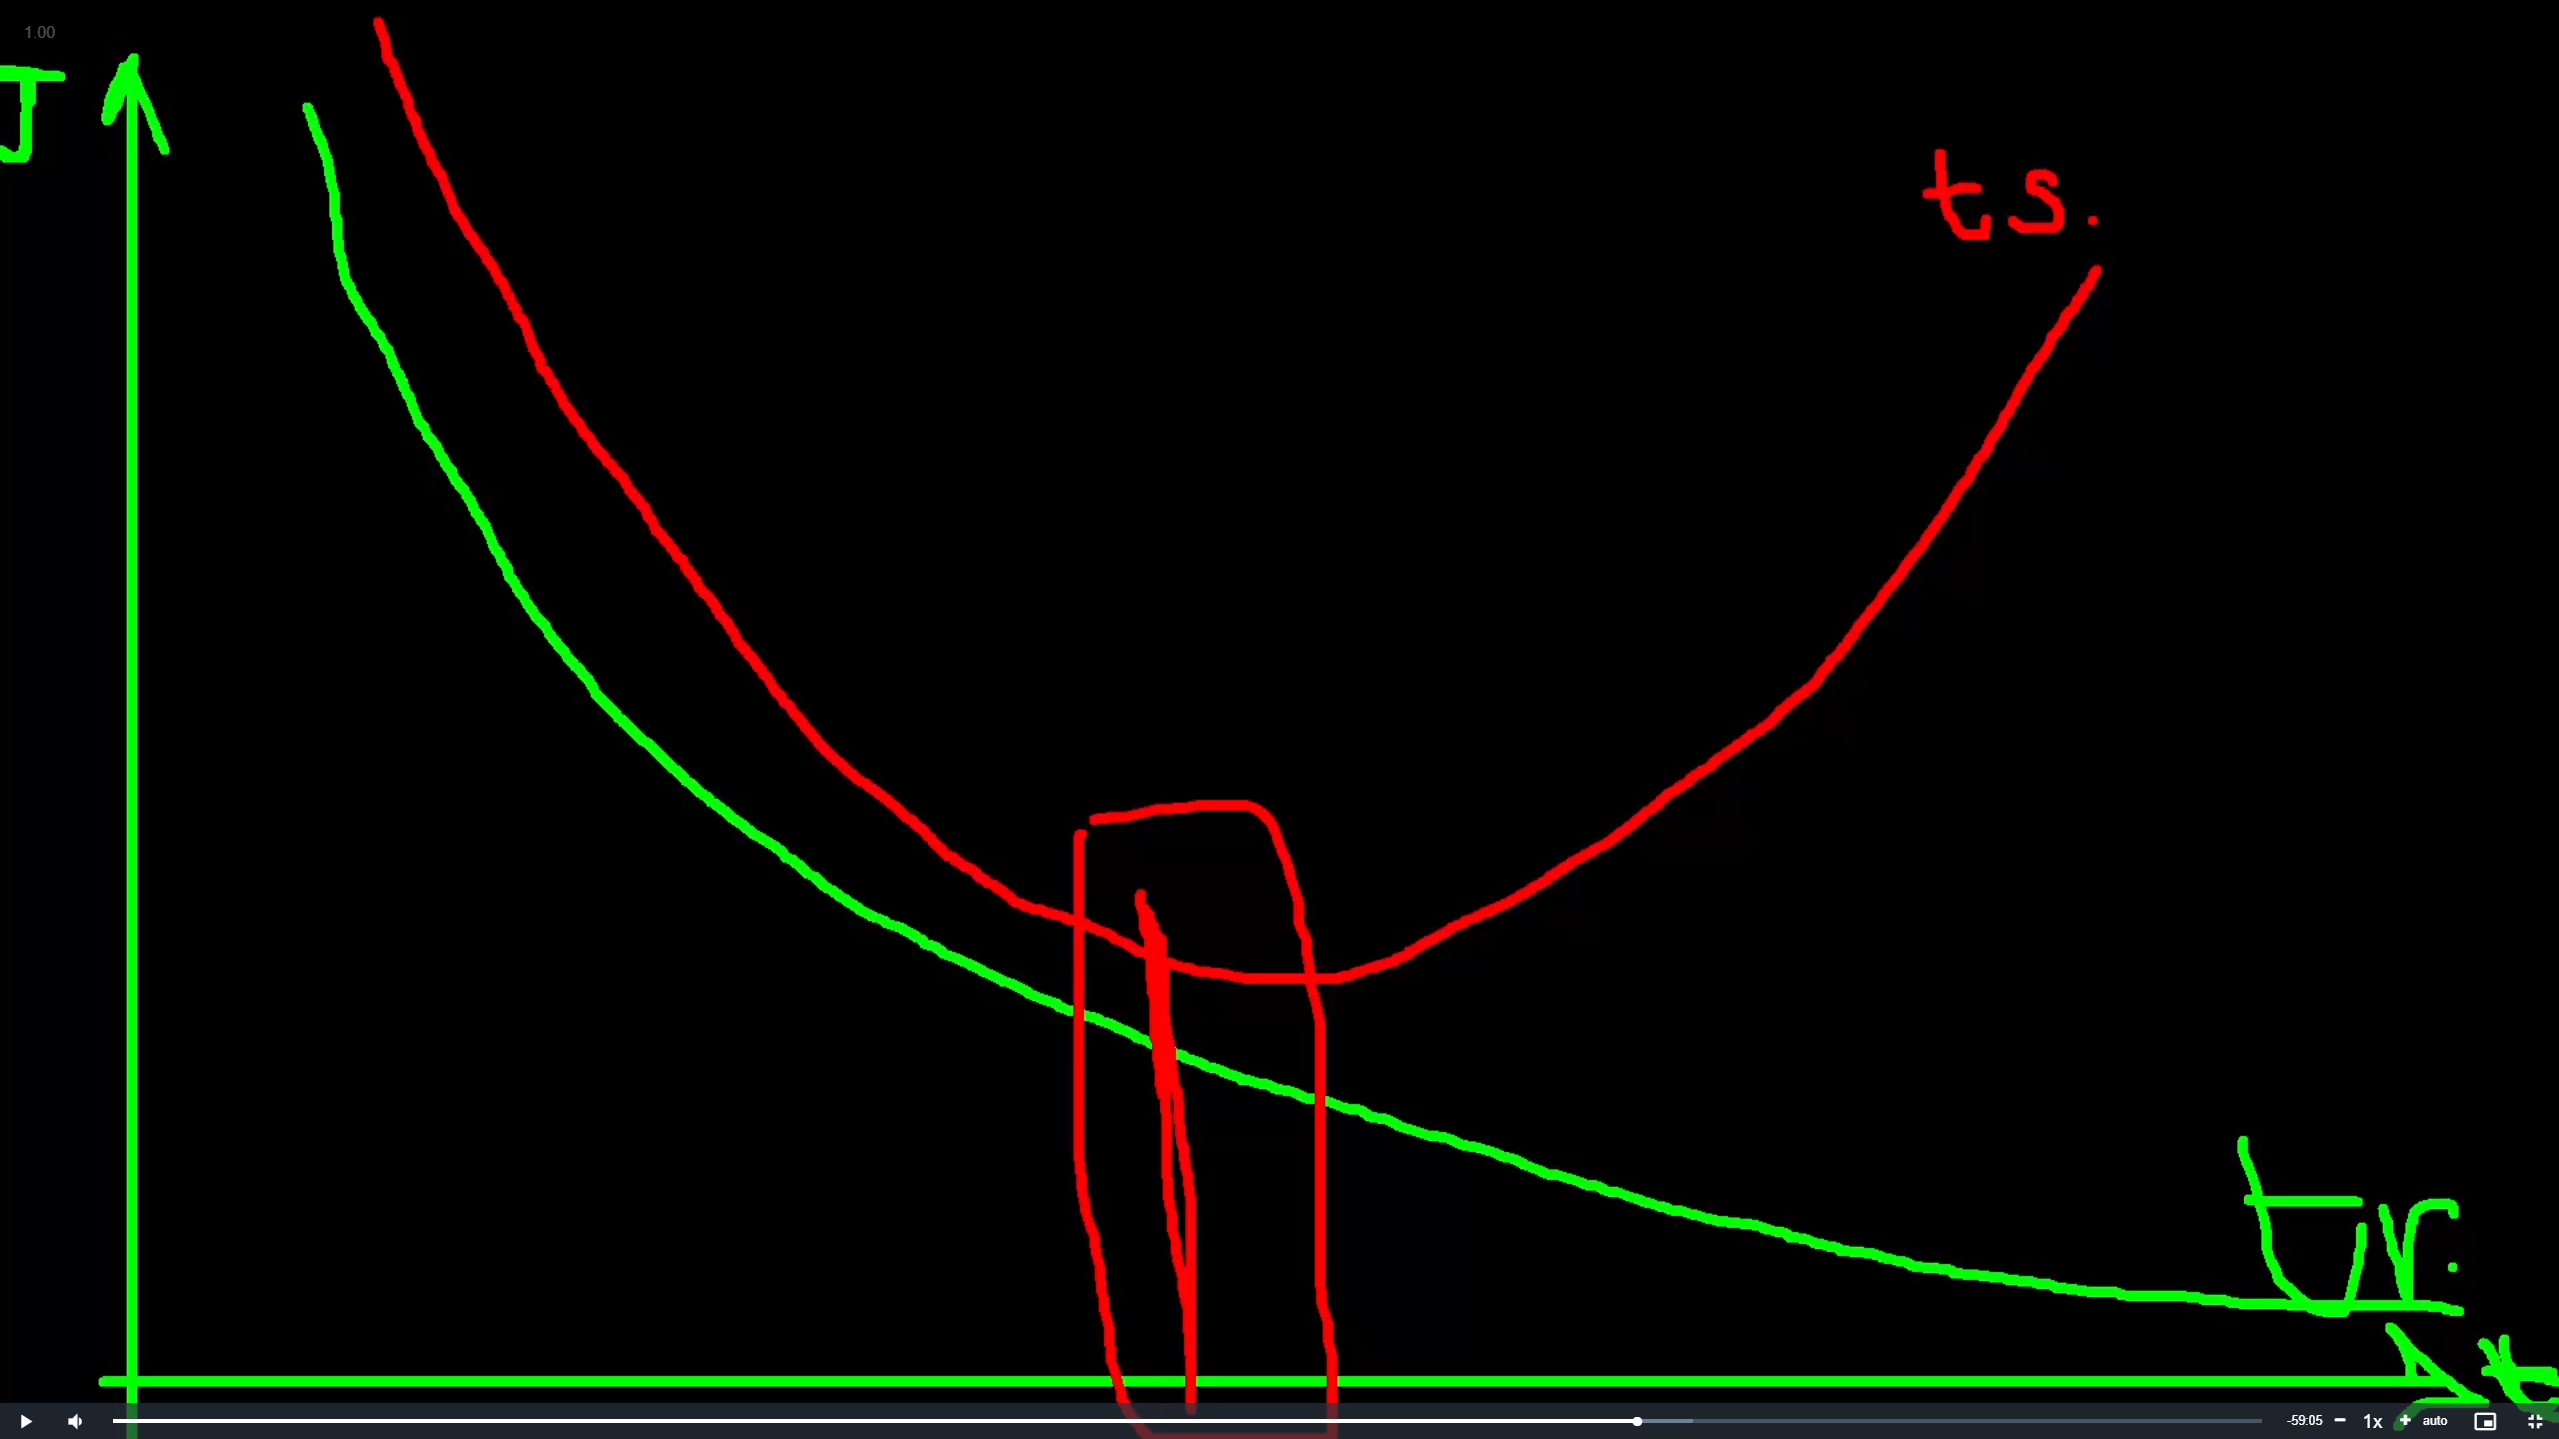

### Using the wrong activation function


If we use sigmoid function instead of softmax we get the following results.

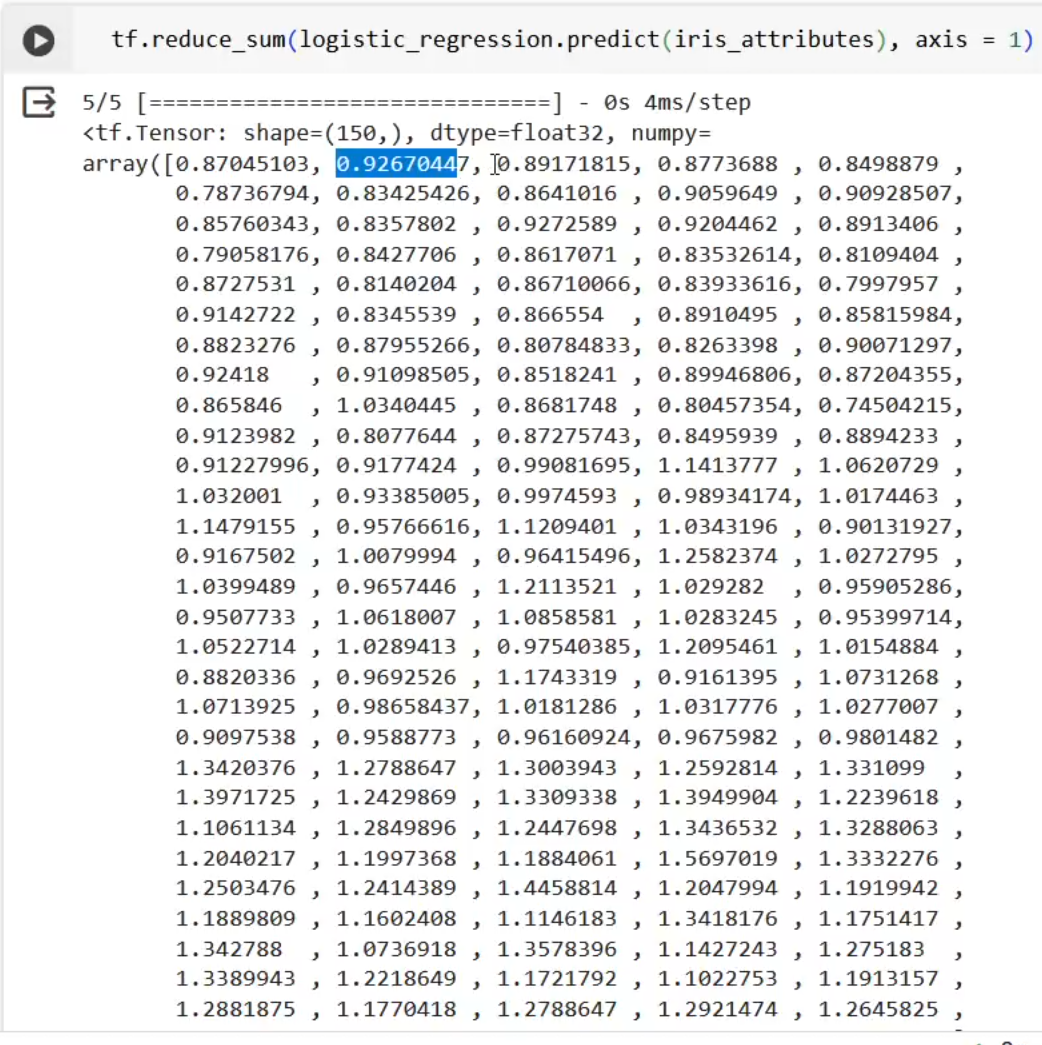

The sum of the prediction probabilities are not 1 !!!

This means we created a NN that did 3 SEPARATE logistic regressions which are 3 different tasks. They are not predicting 3 classes. They are predicting 1 vs many with each one for their class.
Everything works, we get no errors, but if we don't look closely we are solving a different problem!

Here is the reduce_sum of the softmax

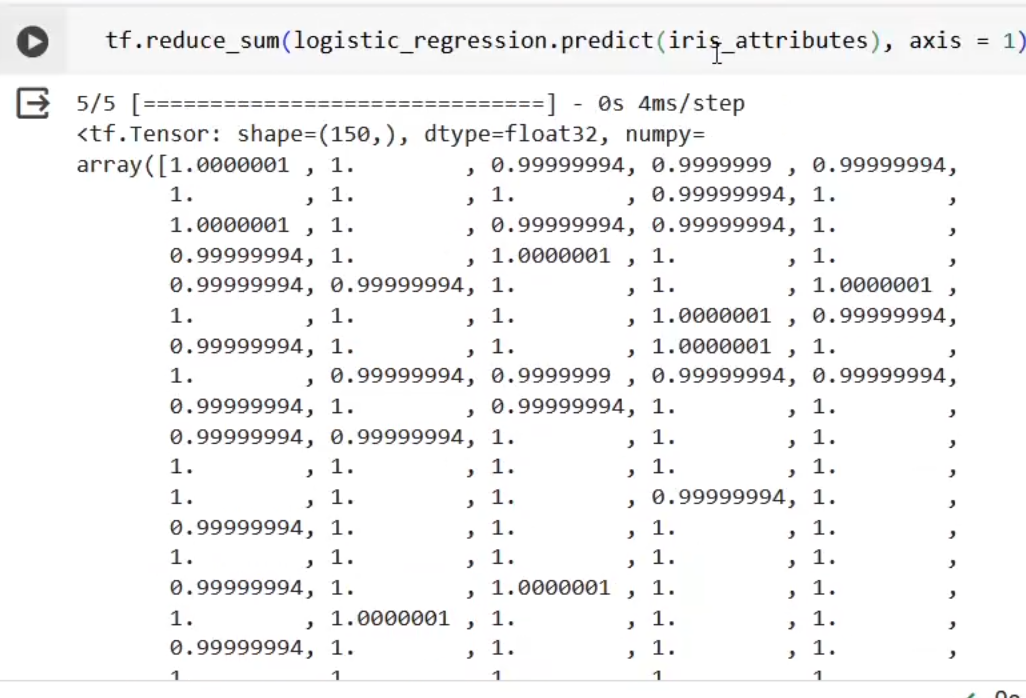

## Using the wrong LOSS function

Using categorical_crossentropy instead of sparse_categorical_crossentropy

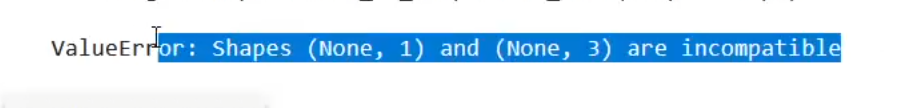

We need to one_hot encode the labels:

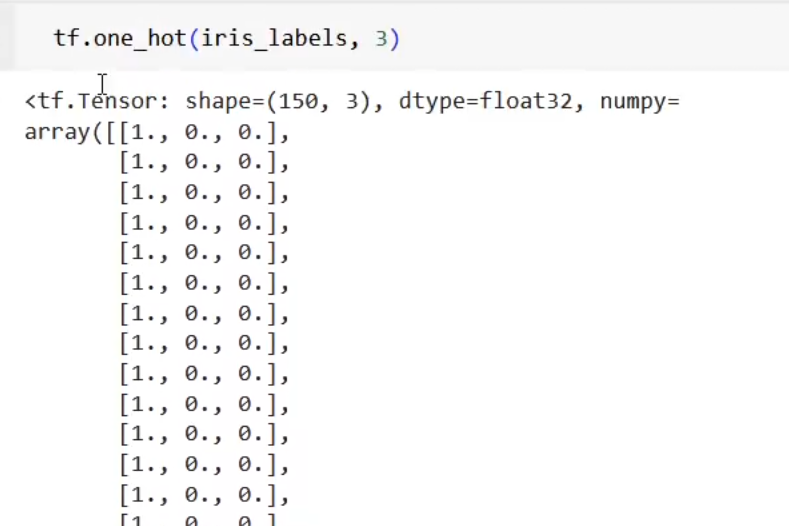

If we don't have sparse it expects the classification labels to be one-hot encoded

In [25]:
iris_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
tf.one_hot(iris_labels, 3)

<tf.Tensor: shape=(150, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
     

## We want to make a linear regression

In [27]:
# Predict the last one based on the rest
iris_attributes_for_regression = iris_attributes[:, :-1]
iris_target_for_regression = iris_attributes[:, -1]

In [28]:
# This is a regression model

linear_regression = Sequential([
    Input(iris_attributes_for_regression.shape[1]),
    Dense(1)
])

In [29]:
# This is a regression model for 5 separate variables, because of the number in the Dense layer

linear_regression_for_five_separate_var = Sequential([
    Input(num_attributes),
    Dense(5)
])

In [30]:
linear_regression.compile(optimizer = "sgd", loss = "mse")

In [31]:
linear_regression.fit(iris_attributes_for_regression, iris_target_for_regression, epochs = 10)

Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 1.9630
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 1.3451
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.9264
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 0.7570
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4553
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.3195
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.2317
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 0.1770
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 0.1372
Epoch 10/10
5/5 [==============================] - 0s 5ms/step - loss: 0.1042


In [32]:
linear_regression.predict(iris_attributes_for_regression)

5/5 [==============================] - 0s 2ms/step


array([[0.47694314],
       [0.28113157],
       [0.42314363],
       [0.514164  ],
       [0.57426333],
       [0.7333209 ],
       [0.62887186],
       [0.5153346 ],
       [0.43306023],
       [0.38953936],
       [0.5165052 ],
       [0.6510466 ],
       [0.32267302],
       [0.37249386],
       [0.359789  ],
       [0.7823331 ],
       [0.52280515],
       [0.47694314],
       [0.5529174 ],
       [0.6969088 ],
       [0.4544264 ],
       [0.6411299 ],
       [0.5299138 ],
       [0.52327216],
       [0.8089334 ],
       [0.34484786],
       [0.56796354],
       [0.48803055],
       [0.3796227 ],
       [0.5810304 ],
       [0.48370975],
       [0.34916848],
       [0.8227039 ],
       [0.7012291 ],
       [0.38953936],
       [0.24588995],
       [0.2581479 ],
       [0.6158049 ],
       [0.43621016],
       [0.47379327],
       [0.4658556 ],
       [0.00421636],
       [0.547768  ],
       [0.62374234],
       [0.90742457],
       [0.32267302],
       [0.7495377 ],
       [0.517

Sequential and Model diff in the layer building:

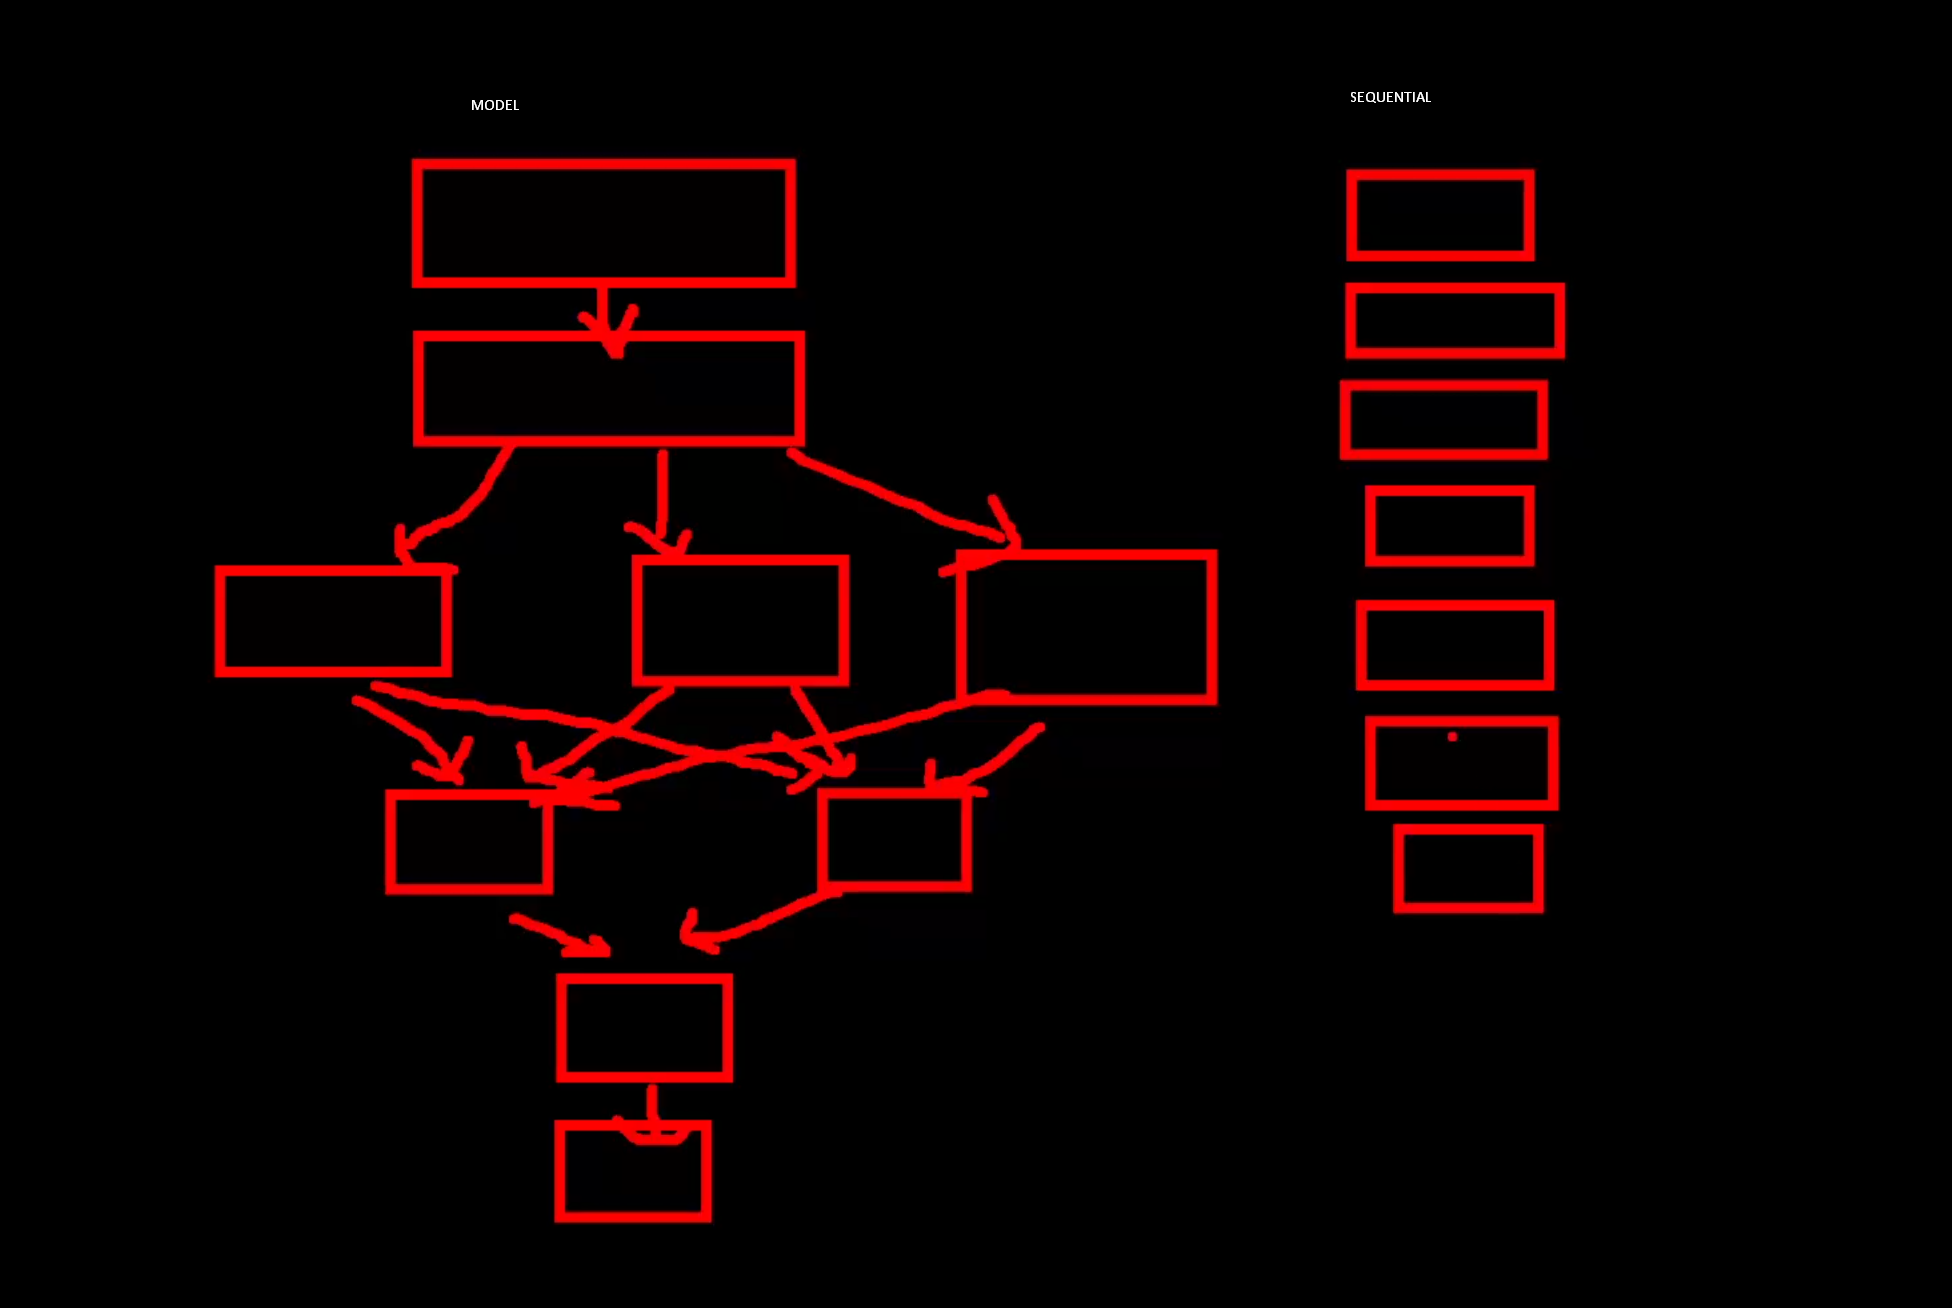

In [39]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [35]:
((mnist_attributes_train, mnist_labels_train), (mnist_attributes_test, mnist_labels_test)) = mnist.load_data()

### Check shapes regularly

Shapes of:
- data
- layers
- results
- activations ( when the data leaves the layer )

In [37]:
mnist_attributes_train.shape, mnist_labels_train.shape, mnist_attributes_test.shape, mnist_labels_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

When we are working with images we usually work with CNN not like we are about to do it. But for the sake of a simple example that is more real we will do it this way.

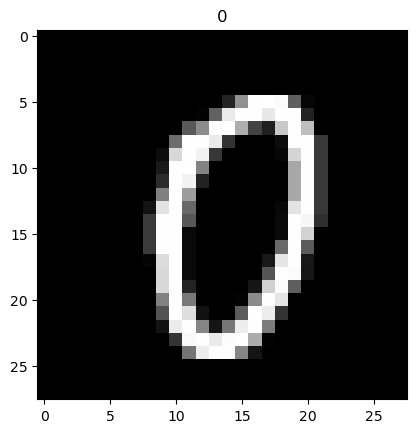

In [49]:
index = 1000
plt.imshow(mnist_attributes_train[index], cmap = "gray")
plt.title(mnist_labels_train[index])

plt.show()

We will be creating a fully connected NN that will never work on images but we have 28x28 images here so it will work on such simple data for this case.

In [53]:
input_shape = mnist_attributes_train.shape[1:]
num_classes = len(set(mnist_labels_train))
input_shape, num_classes

((28, 28), 10)

In [73]:
tf.keras.backend.clear_session()

In [74]:
neural_network = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(512),
    Dense(256),
    Dense(128),
    Dense(64),
    Dense(32),
    Dense(num_classes, activation="softmax")
])

In [75]:
neural_network.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [76]:
neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                3

In [77]:
neural_network.fit(mnist_attributes_train, mnist_labels_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.0987


This model is terrible. It is slow af. It guesses correct 10% of the time because there are 10 classes.

We need activation functions on these hidden layers. Otherwise it is the same as the previous model. It is still linear. 

In [78]:
neural_network.evaluate(mnist_attributes_train, mnist_labels_train)

1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987


[nan, 0.09871666878461838]

We need to normaliza the data and transform it into floating point

In [80]:
mnist_attributes_train.max()

255

In [81]:
mnist_attributes_train = mnist_attributes_train / 256.0
mnist_attributes_train.max()

0.99609375

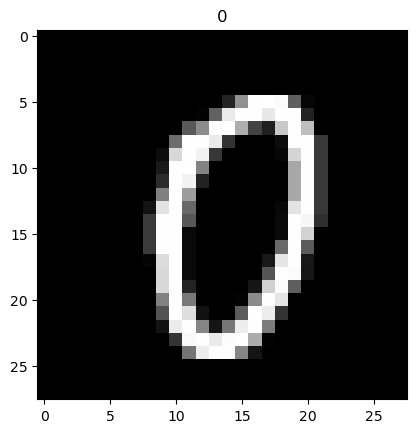

In [82]:
index = 1000
plt.imshow(mnist_attributes_train[index], cmap = "gray")
plt.title(mnist_labels_train[index])

plt.show()

All good

In [83]:
mnist_attributes_test = mnist_attributes_test / 256.0
mnist_attributes_test.max()

0.99609375

Lets try again:

(Scaled not normalized but w/e)

In [84]:
tf.keras.backend.clear_session()

neural_network_normalized = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(512),
    Dense(256),
    Dense(128),
    Dense(64),
    Dense(32),
    Dense(num_classes, activation="softmax")
])

neural_network_normalized.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

neural_network_normalized.fit(mnist_attributes_train, mnist_labels_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4049 - accuracy: 0.8830
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3112 - accuracy: 0.9113
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2971 - accuracy: 0.9157
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2895 - accuracy: 0.9179
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2845 - accuracy: 0.9197
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2810 - accuracy: 0.9212
Epoch 7/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2772 - accuracy: 0.9222
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2747 - accuracy: 0.9237
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2725 - accuracy: 0.9241
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2

We see we have a bigger model, but it is slower and it has the same accuracy. So we need to add an element of non-linearity with an activation function on the hidden layers

In [85]:
tf.keras.backend.clear_session()

neural_network_scaled_non_linear = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(num_classes, activation="softmax")
])

neural_network_scaled_non_linear.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

neural_network_scaled_non_linear.fit(mnist_attributes_train, mnist_labels_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6761 - accuracy: 0.7988
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2225 - accuracy: 0.9358
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1565 - accuracy: 0.9545
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1217 - accuracy: 0.9638
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0968 - accuracy: 0.9712
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0793 - accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0662 - accuracy: 0.9808
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0550 - accuracy: 0.9843
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0458 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

This NN has a higher capacity than the previous ones. It overfits better.

In [86]:
tf.keras.backend.clear_session()

neural_network_scaled_non_linear = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(num_classes, activation="softmax")
])

neural_network_scaled_non_linear.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

neural_network_scaled_non_linear.fit(mnist_attributes_train, mnist_labels_train, epochs=10, validation_data = (mnist_attributes_test, mnist_labels_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6243 - accuracy: 0.8241 - val_loss: 0.2397 - val_accuracy: 0.9290
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2041 - accuracy: 0.9400 - val_loss: 0.1783 - val_accuracy: 0.9472
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1444 - accuracy: 0.9576 - val_loss: 0.1306 - val_accuracy: 0.9594
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1121 - accuracy: 0.9671 - val_loss: 0.1093 - val_accuracy: 0.9651
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0901 - accuracy: 0.9735 - val_loss: 0.1062 - val_accuracy: 0.9655
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0740 - accuracy: 0.9783 - val_loss: 0.0869 - val_accuracy: 0.9725
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0616 - accuracy: 0.9816 - val_loss: 0.0921 - val_ac

In [87]:
from tensorflow.keras.callbacks import TensorBoard

In [88]:
tf.keras.backend.clear_session()

neural_network_scaled_non_linear_callbacks = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(num_classes, activation="softmax")
])

neural_network_scaled_non_linear_callbacks.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

neural_network_scaled_non_linear_callbacks.fit(mnist_attributes_train, mnist_labels_train, epochs=10, validation_data = (mnist_attributes_test, mnist_labels_test), callbacks = [TensorBoard()])

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6735 - accuracy: 0.8033 - val_loss: 0.2561 - val_accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2153 - accuracy: 0.9379 - val_loss: 0.1775 - val_accuracy: 0.9453
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1499 - accuracy: 0.9565 - val_loss: 0.1343 - val_accuracy: 0.9610
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1143 - accuracy: 0.9661 - val_loss: 0.1155 - val_accuracy: 0.9632
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0926 - accuracy: 0.9732 - val_loss: 0.0994 - val_accuracy: 0.9677
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0752 - accuracy: 0.9782 - val_loss: 0.0968 - val_accuracy: 0.9702
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0615 - accuracy: 0.9820 - val_loss: 0.0943 - val_ac

In [89]:
%load_ext tensorboard

In [90]:
%tensorboard --logdir logs

We can save the model as:

In [91]:
neural_network_scaled_non_linear_callbacks.save("model.h5")

/home/alpine/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
neural_network_scaled_non_linear_callbacks.layers[2].weights

[<tf.Variable 'dense_1/kernel:0' shape=(512, 256) dtype=float32, numpy=
 array([[ 4.3458868e-02,  4.3787166e-02,  2.9882107e-02, ...,
         -2.6871406e-02, -4.9738519e-02,  2.6843030e-02],
        [-1.2910680e-02,  1.7808782e-02,  3.9272133e-02, ...,
          7.6319766e-03, -6.4660028e-02,  2.5505047e-05],
        [ 1.4611212e-02,  5.4636989e-02, -7.5021923e-02, ...,
          3.5910953e-02, -1.4676899e-02,  5.0107345e-02],
        ...,
        [-9.0124615e-02, -2.0839081e-03, -7.9312185e-03, ...,
         -4.4388124e-03, -4.8675749e-02,  1.4688320e-02],
        [ 5.9024645e-03,  2.8103475e-02, -2.9954517e-02, ...,
         -8.0960067e-03,  9.1386758e-02, -3.9663918e-02],
        [-5.2754685e-02,  5.0632123e-02, -5.8581367e-02, ...,
         -7.7481650e-02, -3.9628234e-02,  1.7823670e-02]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(256,) dtype=float32, numpy=
 array([ 6.44881651e-03,  2.18317918e-02,  1.43168774e-02, -4.05143201e-03,
         1.98526382e-02,  1.3831225

In [93]:
neural_network_scaled_non_linear_callbacks.layers[2].kernel

<tf.Variable 'dense_1/kernel:0' shape=(512, 256) dtype=float32, numpy=
array([[ 4.3458868e-02,  4.3787166e-02,  2.9882107e-02, ...,
        -2.6871406e-02, -4.9738519e-02,  2.6843030e-02],
       [-1.2910680e-02,  1.7808782e-02,  3.9272133e-02, ...,
         7.6319766e-03, -6.4660028e-02,  2.5505047e-05],
       [ 1.4611212e-02,  5.4636989e-02, -7.5021923e-02, ...,
         3.5910953e-02, -1.4676899e-02,  5.0107345e-02],
       ...,
       [-9.0124615e-02, -2.0839081e-03, -7.9312185e-03, ...,
        -4.4388124e-03, -4.8675749e-02,  1.4688320e-02],
       [ 5.9024645e-03,  2.8103475e-02, -2.9954517e-02, ...,
        -8.0960067e-03,  9.1386758e-02, -3.9663918e-02],
       [-5.2754685e-02,  5.0632123e-02, -5.8581367e-02, ...,
        -7.7481650e-02, -3.9628234e-02,  1.7823670e-02]], dtype=float32)>

In [94]:
neural_network_scaled_non_linear_callbacks.layers[2].kernel.shape

TensorShape([512, 256])

We can inspect like this and see what is happening. 

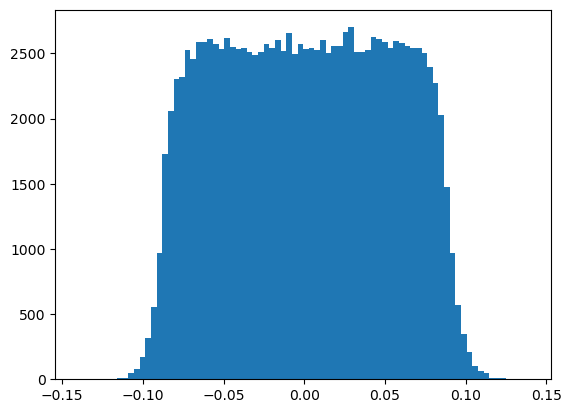

In [97]:
plt.hist(neural_network_scaled_non_linear_callbacks.layers[2].kernel.numpy().ravel(), bins = "fd")
plt.show()

We can do this graph at the beginning and at the end of the training to see if the model is learning

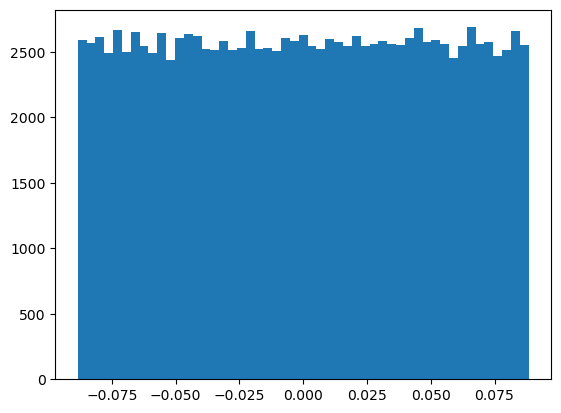

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6580 - accuracy: 0.8060 - val_loss: 0.2546 - val_accuracy: 0.9242
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2153 - accuracy: 0.9374 - val_loss: 0.1679 - val_accuracy: 0.9493
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1511 - accuracy: 0.9563 - val_loss: 0.1521 - val_accuracy: 0.9544
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1168 - accuracy: 0.9660 - val_loss: 0.1258 - val_accuracy: 0.9622
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0934 - accuracy: 0.9734 - val_loss: 0.1050 - val_accuracy: 0.9684
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.0911 - val_accuracy: 0.9725
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0624 - accuracy: 0.9818 - val_loss: 0.0932 - val_ac

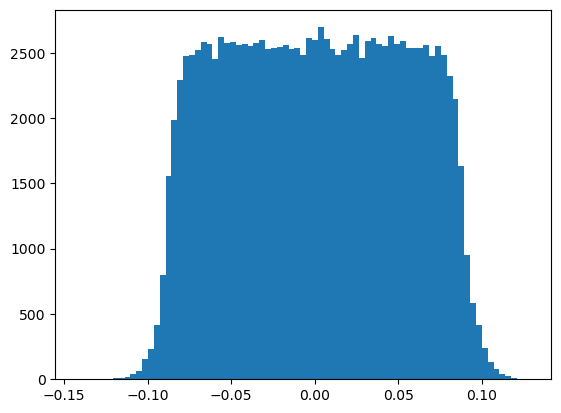

In [99]:
tf.keras.backend.clear_session()

neural_network_scaled_non_linear_callbacks_learning_test = Sequential([
    Input(input_shape),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(num_classes, activation="softmax")
])

neural_network_scaled_non_linear_callbacks_learning_test.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

plt.hist(neural_network_scaled_non_linear_callbacks_learning_test.layers[2].kernel.numpy().ravel(), bins = "fd")
plt.show()

neural_network_scaled_non_linear_callbacks_learning_test.fit(mnist_attributes_train, mnist_labels_train, epochs=10, validation_data = (mnist_attributes_test, mnist_labels_test), callbacks = [TensorBoard()])

plt.hist(neural_network_scaled_non_linear_callbacks_learning_test.layers[2].kernel.numpy().ravel(), bins = "fd")
plt.show()